# Name : MD Nasir Uddin
# ID : B02721
# Exploratory Data Analysis (EDA) on Titanic Dataset Using Python

## Problem Statement
The Titanic disaster is one of the most well-known maritime tragedies in history. Over 1,500 people lost their lives when the ship sank after hitting an iceberg. With the help of data, we can explore key insights about the passengers and the factors that might have influenced survival rates.

This article will guide you through the process of performing Exploratory Data Analysis (EDA) on the famous Titanic dataset to uncover patterns and correlations. EDA is a crucial first step in any data science or machine learning project, as it helps you understand your dataset before building predictive models.

## Technical Stack
* Python: Our primary programming language.
* Pandas: To clean, explore, and manipulate the data.
* Matplotlib/Seaborn: To create visualizations and better understand the dataset.

## Steps Followed

### Step 1: Import Necessary Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


### Step 2: Loading the Dataset
The Titanic dataset is available on platforms like Kaggle. We'll start by loading it into a Pandas DataFrame and inspecting its structure.

In [2]:
# Load the Titanic dataset
titanic_df = pd.read_csv('Titanic-Dataset.csv')

# Display the first few rows
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Display the last few rows
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
titanic_df.shape

(891, 12)

In [5]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


This dataset contains information such as:

* PassengerID: contains Unique identifier for each passenger.
* Survived: Whether the passenger survived (0 = No, 1 = Yes).
* Pclass: Passenger class (1 = First, 2 = Second, 3 = Third).
* Name: Name of the passenger.
* Sex: Gender of the passenger.
* Age: Age of the passenger.
* SibSp: Number of siblings/spouses aboard the titanic.
* Parch: Number of parents/children aboard the titanic.
* Ticket: Ticket Number of the passenger
* Fare: Fare paid by the passenger.
* Cabin: Cabin number of the passenger
* Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

### Step 3: Data Cleaning
Before we dive into analysis, we need to ensure the data is clean and ready to use. This includes handling missing values, duplicates, and incorrect data types.

In [7]:
# Check for missing values
print(titanic_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


#### 1. Dropping the "Cabin" Column

Since the "Cabin" column has a significant number of missing values (687), we can drop this column entirely as it doesn't add much value to our analysis. We can drop it like this:

In [8]:
titanic_df = titanic_df.drop(['Cabin'], axis=1)


#### 2. Handling Missing Values in the "Age" Column

There are 177 missing values in the "Age" column, which could be an important feature in the analysis. We can handle these missing values by filling with the median/mean. The median is often a better choice for skewed distributions.

In [9]:
# Fill missing values in 'Age' with median age
titanic_df['Age'].fillna(titanic_df['Age'].median())

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

#### 3. Handling Missing Values in the "Embarked" Column

There are only 2 missing values in the "Embarked" column, so we can either: Fill with the mode (the most common value) or Drop the rows with missing values.

In [10]:
# Fill missing 'Embarked' with the most common port
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0])

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [11]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

### Step 4: Analysing Survival based on Gender

In this step, we will investigate how survival rates vary between different genders. By examining survival patterns across gender, we can gain insights into how gender influenced the likelihood of survival.

Number of survivors by gender:
Sex
female    233
male      109
Name: Survived, dtype: int64


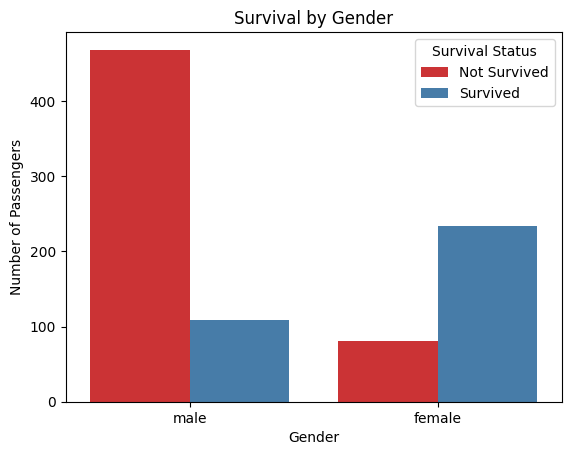

In [12]:
# Get the number of survivors by gender
survival_by_gender = titanic_df.groupby('Sex')['Survived'].sum()
total_passengers_by_gender = titanic_df['Sex'].value_counts()

print("Number of survivors by gender:")
print(survival_by_gender)

# Plotting the number of survivors by gender
sns.countplot(x='Sex', hue='Survived', data=titanic_df, palette='Set1')

# Adding title and labels
plt.title('Survival by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Passengers')

# Adjusting the legend to show what 0 and 1 represent in survival
plt.legend(title='Survival Status', loc='upper right', labels=['Not Survived', 'Survived'])

# Show the plot
plt.show()


From this analysis, we can discover that women had a higher survival rate than men due to the "women and children first" protocol.

### Step 4: Analyzing Survival and Passenger Class
In this step, we'll quantify survival rates across different passenger classes. By examining how survival rates differ between 1st, 2nd, and 3rd class passengers, we can uncover how passenger class impacted the chances of survival.

Number of survivors by Passenger Class:
   Passenger Class  Number of Survivors
0                1                  136
1                2                   87
2                3                  119


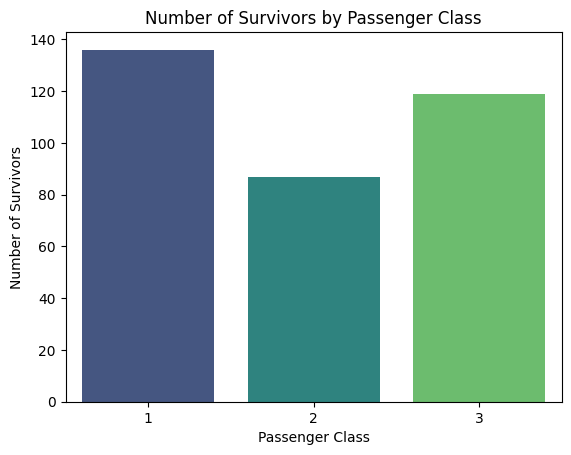

In [13]:
# Calculate the number of survivors by passenger class
survivors_by_class = titanic_df.groupby('Pclass')['Survived'].sum().reset_index()

# Rename columns for clarity
survivors_by_class.columns = ['Passenger Class', 'Number of Survivors']

print("Number of survivors by Passenger Class:")
print(survivors_by_class)

# Plotting the number of survivors by passenger class
sns.barplot(x='Passenger Class', y='Number of Survivors', data=survivors_by_class, palette='viridis')

# Adding title and axis labels
plt.title('Number of Survivors by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Survivors')

# Show the plot
plt.show()


The visualization show that first-class passengers had a significantly higher survival rate than those in third class.

### Step 5: Investigating Age and Survival
Age is another critical factor to explore. Were younger passengers more likely to survive? We can create visualizations to examine the distribution of ages among survivors.

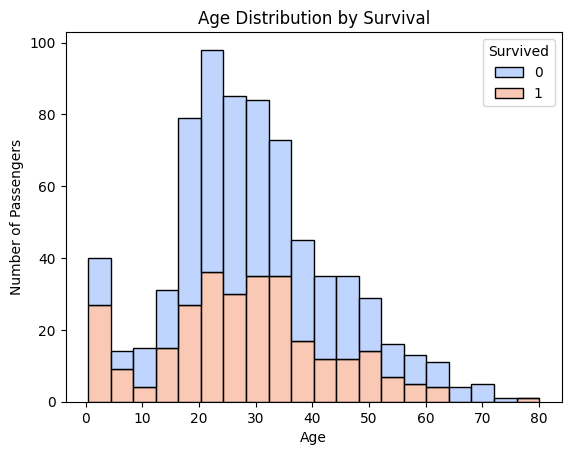

In [14]:
# Plotting the distribution of age for survivors and non-survivors
sns.histplot(data=titanic_df, x='Age', hue='Survived', multiple='stack', palette='coolwarm', bins=20)

# Adding title and axis labels
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')

# Show the plot
plt.show()


Passengers below the age of 40 are more likely to survive

### Step 7: Visualizing Fare and Survival
We’ll analyze whether passengers who paid more for their tickets had a higher survival rate.
A box plot can show the distribution of fare for survivors and non-survivors, highlighting the median, quartiles, and potential outliers.

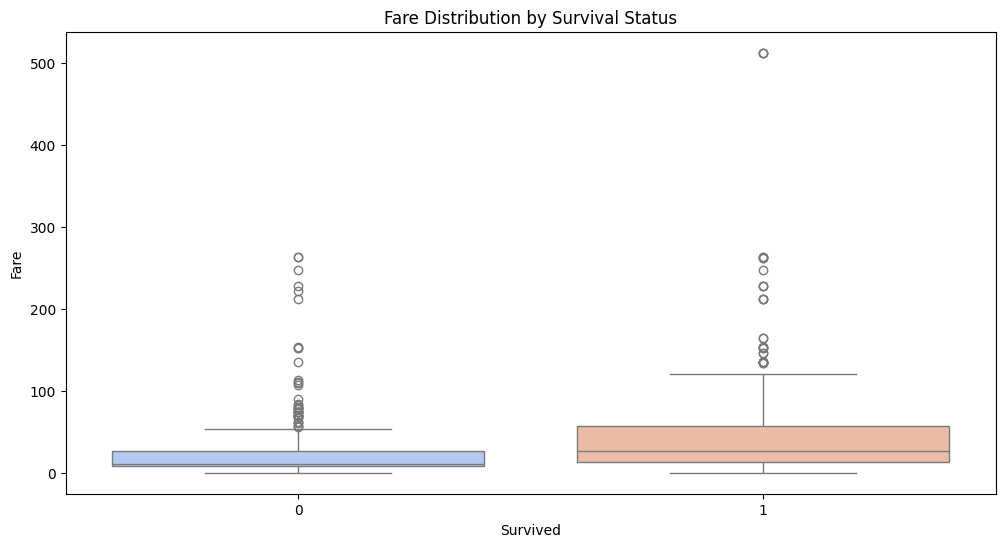

In [15]:
# Box plot of fare by survival status
plt.figure(figsize=(12, 6))
sns.boxplot(data=titanic_df, x='Survived', y='Fare', palette='coolwarm')

# Adding title and axis labels
plt.title('Fare Distribution by Survival Status')
plt.xlabel('Survived')
plt.ylabel('Fare')

# Show the plot
plt.show()


### Conclusion

Exploratory Data Analysis (EDA) is a vital step in any data-driven project. In this analysis of the Titanic dataset, we uncovered several interesting patterns:

* Gender: Women were more likely to survive than men.
* Class: First-class passengers had a much higher survival rate compared to third-class passengers.
* Age: Passengers below the age of 40 are more likely to survive.
* Fare: Those who paid higher fares (first-class passengers) had a better chance of survival.

EDA not only helps us understand the dataset but also guides future machine learning models by revealing important features that influence outcomes. This analysis can be further extended by building predictive models to estimate the survival likelihood of passengers based on their attributes.

## References

Kaggle Titanic Dataset

Pandas Documentation

Seaborn Documentation
